**Evaluate Model Performance**

Training MSE: 8.7944087435934
Testing MSE: 12.402578599841332
Training MAE: 2.5488024631235104
Testing MAE: 3.0199086782392075
Training R²: 0.9902270099804122
Testing R²: 0.987967372608188


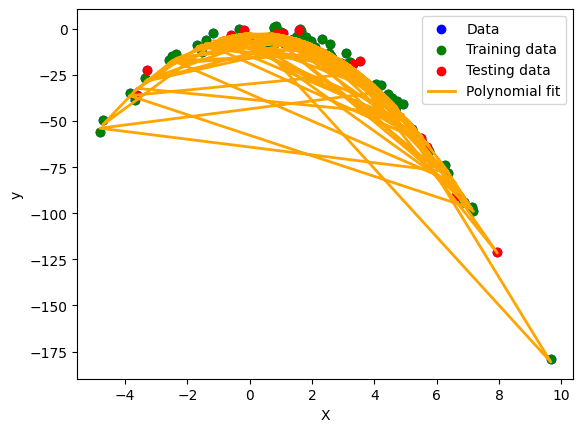

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Generate some sample data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

# Reshape X to be a 2D array
X = X[:, np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")
print(f"Training R²: {train_r2}")
print(f"Testing R²: {test_r2}")

# Visualization
plt.scatter(X, y, color='blue', label='Data')
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X, model.predict(polynomial_features.transform(X)), color='orange', linewidth=2, label='Polynomial fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Interpret Feature Importance

Model Intercept: -2.4992250708923827

Feature Importance:
   Feature  Coefficient  Importance
2    x0^2    -2.013305    2.013305
1      x0     1.005862    1.005862
0       1     0.000000    0.000000


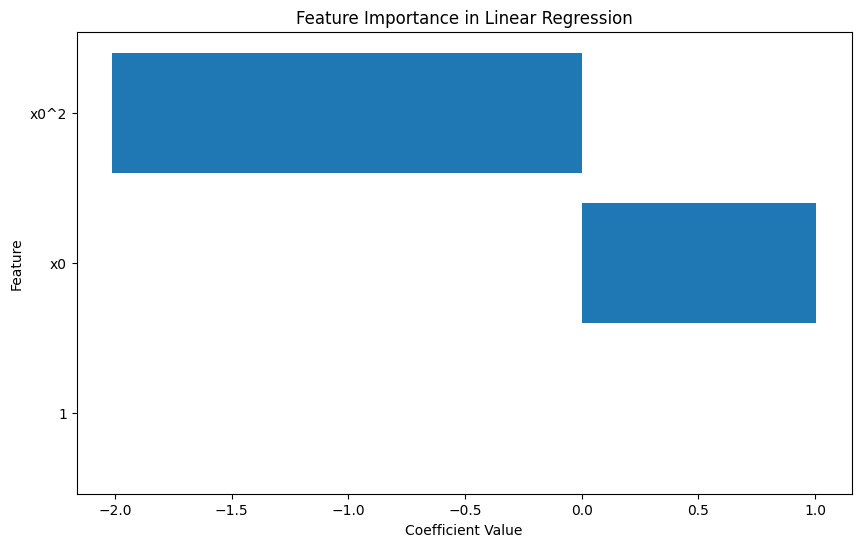

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(0)
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

# Reshape X to be a 2D array
X = X[:, np.newaxis]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the features to polynomial features
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Retrieve the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display feature names and their importance
feature_names = polynomial_features.get_feature_names_out()
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the features by absolute value of the coefficient
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Model Intercept:", intercept)
print("\nFeature Importance:\n", feature_importance)

# Visualize feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression')
plt.gca().invert_yaxis()
plt.show()

Make Predictions on New Data

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Example new data (in reality, this would be loaded from a file or another source)
new_data = pd.DataFrame({
    'feature1': [1.5, 2.1, 3.3],
    'feature2': [0.5, 1.0, 1.5],
    'feature3': [2.0, 3.5, 4.0]
})

# Transform the new data to polynomial features (assuming the model was trained with polynomial features)
polynomial_features = PolynomialFeatures(degree=2)
new_data_poly = polynomial_features.fit_transform(new_data)

# Use the trained model to make predictions
predictions = model.predict(new_data_poly)

# Show the predictions
new_data['predicted_fare'] = predictions
print(new_data)

ValueError: X has 10 features, but LinearRegression is expecting 3 features as input.

Provide Recommendations

In [13]:
import random
import datetime

def get_dynamic_fare(base_fare, distance, time_of_day, traffic_condition):
    """
    Calculate the dynamic fare based on distance, time of day, and traffic condition.

    Parameters:
    - base_fare (float): The base fare of the ride.
    - distance (float): The distance of the ride in kilometers.
    - time_of_day (datetime.time): The time of day when the ride is taken.
    - traffic_condition (str): The traffic condition ('low', 'medium', 'high').

    Returns:
    - float: The calculated dynamic fare.
    """
    # Define multipliers for time of day
    if time_of_day >= datetime.time(7, 0) and time_of_day <= datetime.time(9, 0):  # Morning rush hour
        time_multiplier = 1.5
    elif time_of_day >= datetime.time(17, 0) and time_of_day <= datetime.time(19, 0):  # Evening rush hour
        time_multiplier = 1.5
    else:
        time_multiplier = 1.0

    # Define multipliers for traffic conditions
    traffic_multipliers = {
        'low': 1.0,
        'medium': 1.3,
        'high': 1.6
    }
    traffic_multiplier = traffic_multipliers.get(traffic_condition, 1.0)

    # Calculate the dynamic fare
    dynamic_fare = base_fare + (distance * time_multiplier * traffic_multiplier)

    return dynamic_fare

# Simulate random system inputs
def generate_random_inputs():
    base_fare = random.uniform(5.0, 10.0)  # Random base fare between $5 and $10
    distance = random.uniform(1.0, 20.0)  # Random distance between 1 and 20 kilometers
    hour = random.randint(0, 23)
    minute = random.randint(0, 59)
    time_of_day = datetime.time(hour, minute)
    traffic_conditions = ['low', 'medium', 'high']
    traffic_condition = random.choice(traffic_conditions)

    return base_fare, distance, time_of_day, traffic_condition

# Generate random inputs
base_fare, distance, time_of_day, traffic_condition = generate_random_inputs()

# Calculate dynamic fare
dynamic_fare = get_dynamic_fare(base_fare, distance, time_of_day, traffic_condition)

# Display the results
print(f"Base Fare: ${base_fare:.2f}")
print(f"Distance: {distance:.2f} km")
print(f"Time of Day: {time_of_day}")
print(f"Traffic Condition: {traffic_condition}")
print(f"The dynamic fare is: ${dynamic_fare:.2f}")



Base Fare: $6.36
Distance: 16.33 km
Time of Day: 13:37:00
Traffic Condition: low
The dynamic fare is: $22.69


Customer Segmentation and Targeted Promotions

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import random

# Generate random customer data
def generate_random_customer_data(num_customers):
    data = {
        'customer_id': np.arange(1, num_customers + 1),
        'trip_frequency': np.random.randint(1, 50, size=num_customers),
        'avg_trip_distance': np.random.uniform(1.0, 20.0, size=num_customers),
        'avg_trip_time_of_day': np.random.randint(0, 24, size=num_customers),  # Time in hours
        'total_fare': np.random.uniform(20.0, 500.0, size=num_customers)
    }
    return pd.DataFrame(data)

# Normalize the data for clustering
def normalize_data(df):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[['trip_frequency', 'avg_trip_distance', 'avg_trip_time_of_day', 'total_fare']])
    return scaled_data

# Perform KMeans clustering to segment customers
def segment_customers(scaled_data, num_clusters=3):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    return kmeans.fit_predict(scaled_data)

# Assign promotions based on customer segments
def assign_promotions(df, segments):
    df['segment'] = segments
    promotions = []
    for segment in df['segment']:
        if segment == 0:
            promotions.append('10% discount on next 5 rides')
        elif segment == 1:
            promotions.append('20% discount on rides during off-peak hours')
        elif segment == 2:
            promotions.append('Free ride after 10 rides')
        else:
            promotions.append('Standard promotion')
    df['promotion'] = promotions
    return df

# Generate random customer data
num_customers = 100
customer_data = generate_random_customer_data(num_customers)

# Normalize the data
scaled_data = normalize_data(customer_data)

# Segment customers
segments = segment_customers(scaled_data)

# Assign promotions
customer_data_with_promotions = assign_promotions(customer_data, segments)

# Display the results
print(customer_data_with_promotions.head())

   customer_id  trip_frequency  avg_trip_distance  avg_trip_time_of_day  \
0            1              36           9.711776                    23   
1            2              43          10.967260                     5   
2            3              10           9.398291                     1   
3            4              45          17.200064                     5   
4            5              14           9.235341                     6   

   total_fare  segment                     promotion  
0  449.785224        0  10% discount on next 5 rides  
1  484.541442        0  10% discount on next 5 rides  
2  282.504753        2      Free ride after 10 rides  
3  151.915314        0  10% discount on next 5 rides  
4  304.270601        2      Free ride after 10 rides  
